# Bathymetry closeup

Get a closeup to a particular part of bathymetry file and compare with underlying gebco data.
See https://github.com/OceansAus/access-om2/issues/99

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
# import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib import cm
import netCDF4 as nc
import IPython.display

In [3]:
# file = '/g/data3/hh5/tmp/cosima/bathymetry/topog_latest.nc'

# see https://github.com/OceansAus/access-om2/issues/99
# badbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_10_17_yenesei.nc'
# # fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_12_06_2018.baffin.nc'
# fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_13_06_2018.baffin.nc'
badbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_13_06_2018.baffin.nc'
fixedbathyfile = '/g/data3/hh5/tmp/cosima/bathymetry/topog_05_09_2018_1m_partial.nc'

baddepth = nc.Dataset(badbathyfile).variables['depth'][:,:]
depth = nc.Dataset(fixedbathyfile).variables['depth'][:,:]

file2 = '/g/data3/hh5/tmp/cosima/bathymetry/ocean_hgrid.nc'
data2 = nc.Dataset(file2)
lons = data2.variables['x'][::2,::2]
lats = data2.variables['y'][::2,::2]

In [4]:
# location of point of interest as reported by MOM (indexing from 1 presumably)

i = 1111
j = 2200

margin = 160

In [5]:
# adjust to suit 0-starting index (assuming MOM reports indexing from 1)
i -= 1
j -= 1
print('depth('+str(i)+','+str(j)+')='+str(depth[j,i]))

depth(1110,2199)=49.327274


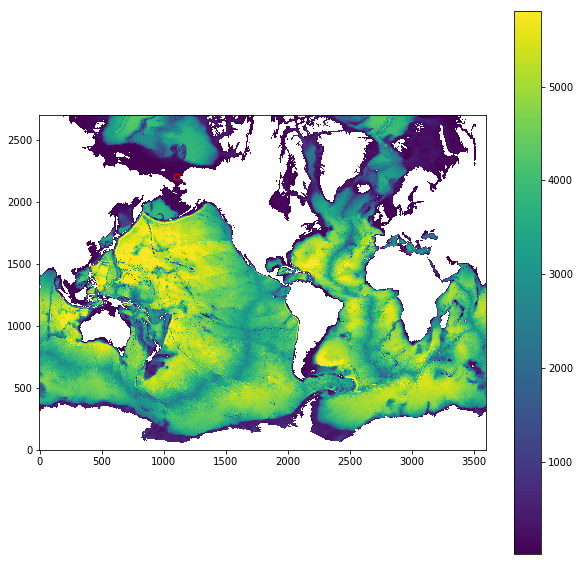

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(depth, origin='lower')
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r');

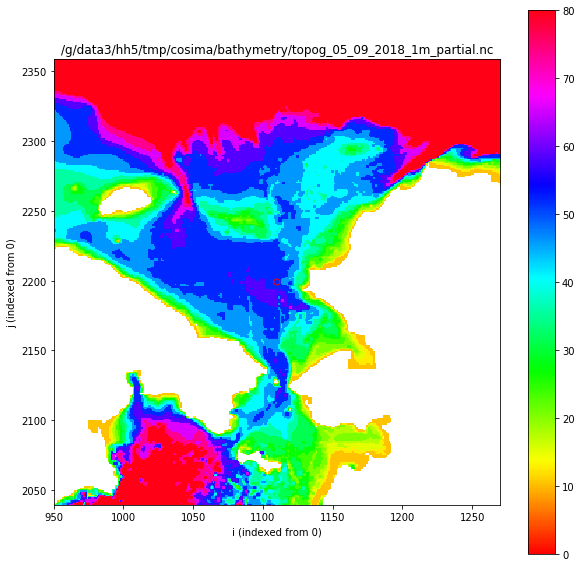

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(baddepth, vmin=0, vmax=80, origin='lower', cmap=plt.cm.hsv)
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(i-margin,i+margin)
plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

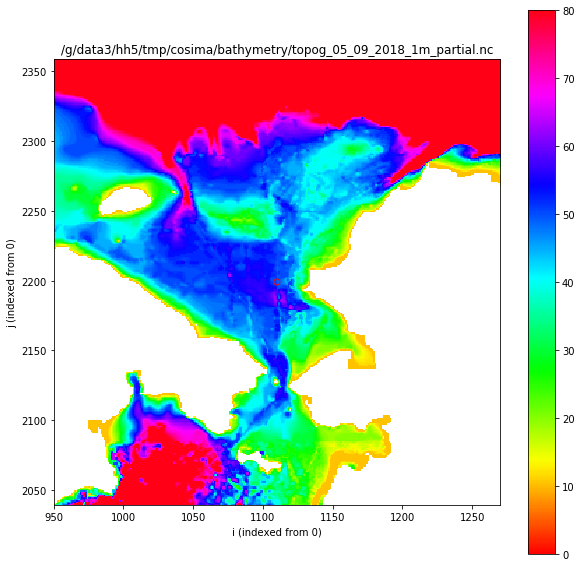

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(depth, vmin=0, vmax=80, origin='lower', cmap=plt.cm.hsv)
plt.colorbar()
plt.scatter(i,j, facecolors='none', edgecolors='r')
plt.xlim(i-margin,i+margin)
plt.ylim(j-margin,j+margin)
plt.title(fixedbathyfile)
plt.xlabel('i (indexed from 0)')
plt.ylabel('j (indexed from 0)');

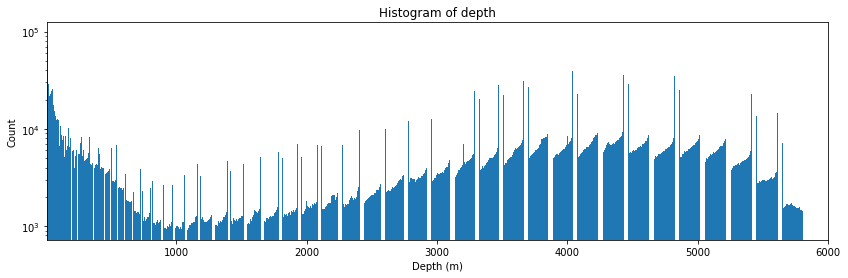

In [9]:
plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(depth), bins=1500, log=True);
plt.xlim(10, 6000)
plt.xlabel('Depth (m)')
plt.ylabel('Count');
plt.title('Histogram of depth');

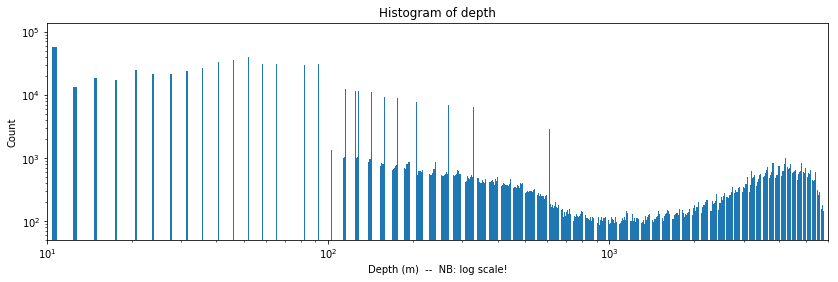

In [10]:
plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(baddepth), bins=15000, log=True);
plt.xlim(10, 6000)
plt.xscale('log')
plt.xlabel('Depth (m)  --  NB: log scale!')
plt.ylabel('Count');
plt.title('Histogram of depth');

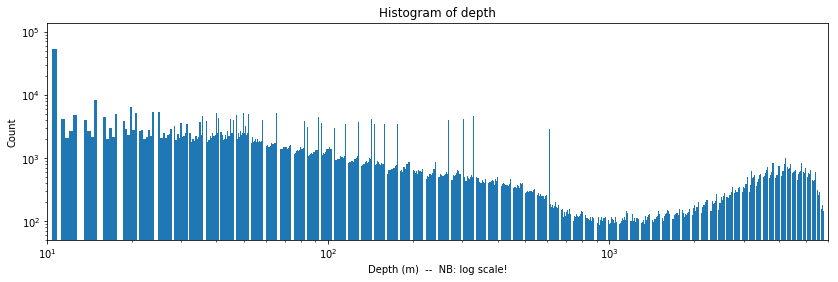

In [11]:
plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(depth), bins=15000, log=True);
plt.xlim(10, 6000)
plt.xscale('log')
plt.xlabel('Depth (m)  --  NB: log scale!')
plt.ylabel('Count');
plt.title('Histogram of depth');

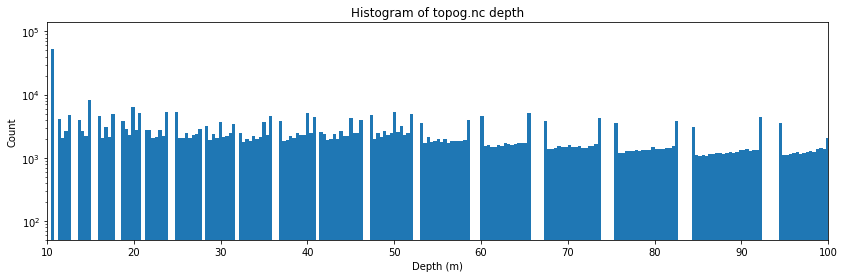

In [12]:
plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(depth), bins=15000, log=True);
plt.xlim(10, 100)
plt.xlabel('Depth (m)')
plt.ylabel('Count');
plt.title('Histogram of topog.nc depth');

In [13]:
change = depth - baddepth

In [14]:
change.min()

-4.9999084

In [15]:
change.max()

125.17456

In [16]:
change.mean()

0.020548005657790618

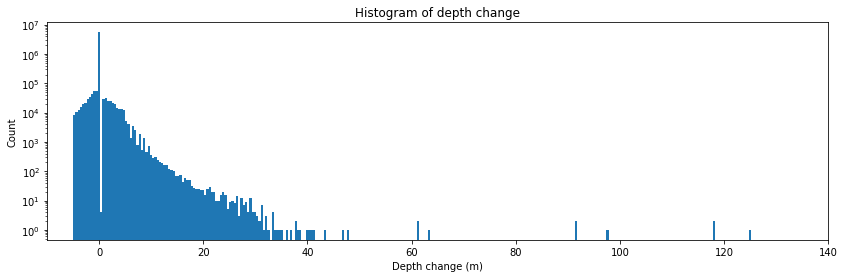

In [17]:
plt.figure(figsize=(14,4))
plt.hist(np.ma.ravel(change), bins=300, log=True);
plt.xlim(-10, 140)
plt.xlabel('Depth change (m)')
plt.ylabel('Count');
plt.title('Histogram of depth change');

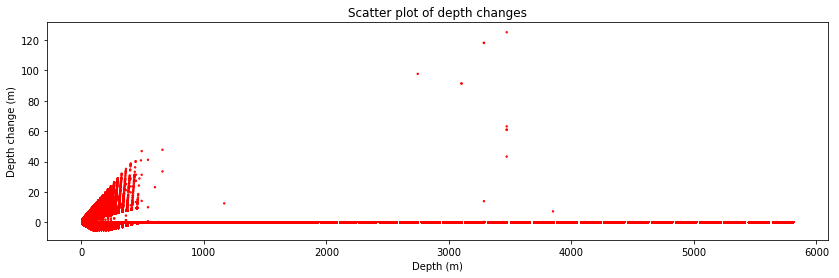

In [18]:
plt.figure(figsize=(14,4))
plt.scatter(np.ma.ravel(depth),np.ma.ravel(depth-baddepth),s=2, facecolors='none', edgecolors='r')
plt.xlabel('Depth (m)')
plt.ylabel('Depth change (m)');
plt.title('Scatter plot of depth changes');